In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\vgsales.csv")

In [4]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","")

In [5]:
df=df.loc[:,~df.columns.isin(["rank"])]
df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


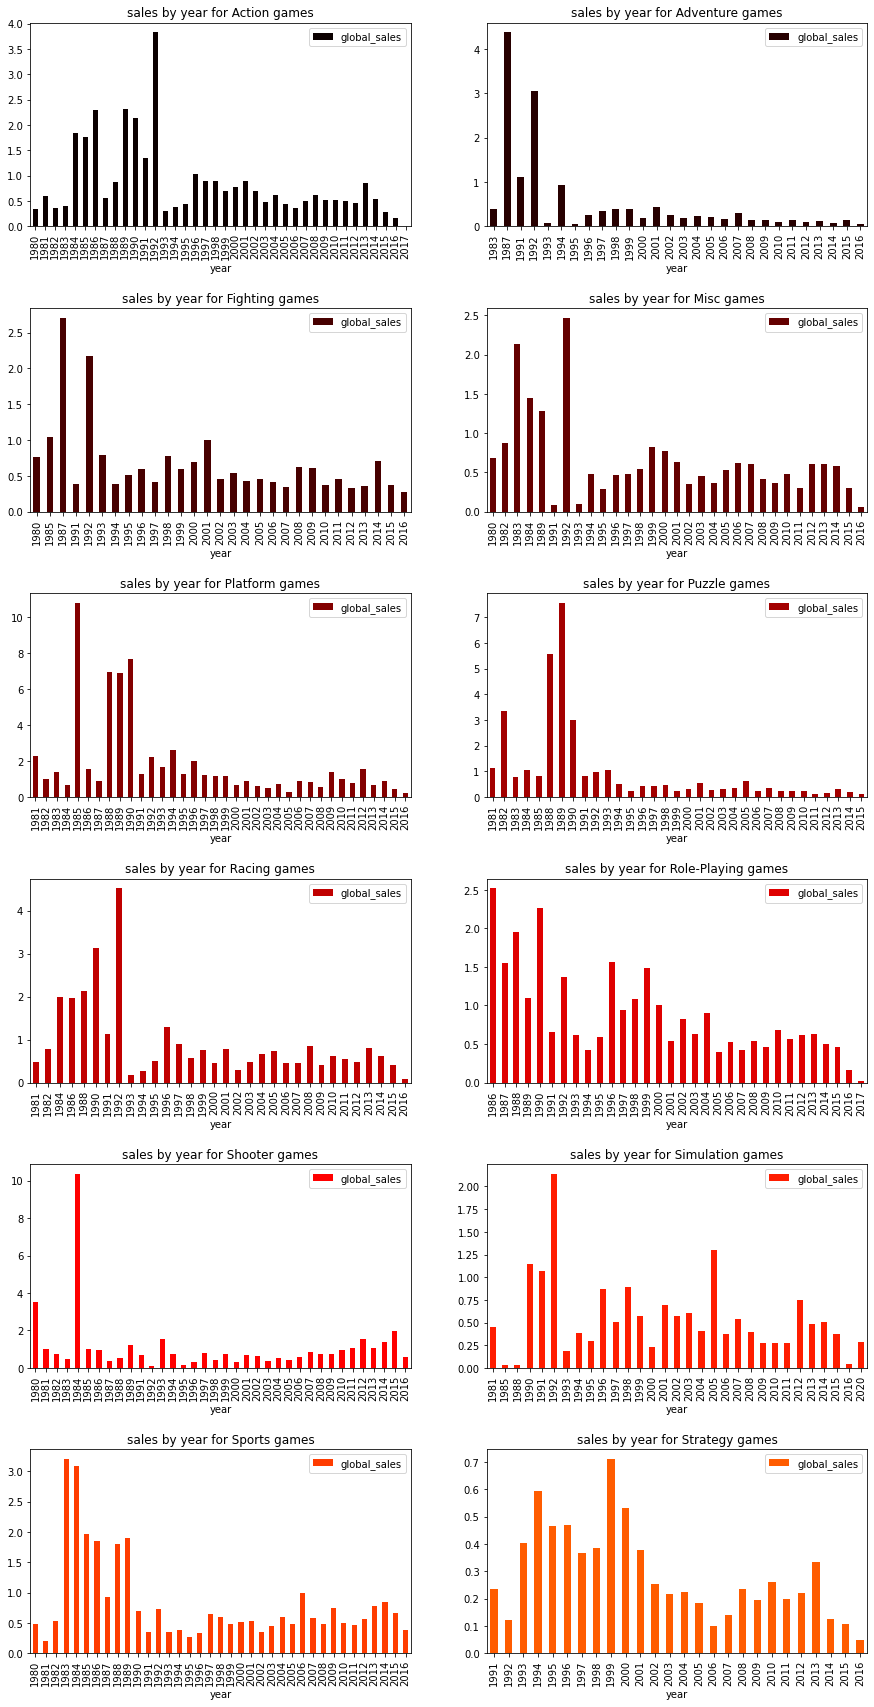

In [6]:
cmap=plt.get_cmap("hot")
colors=list(cmap(np.linspace(0,0.5,len(df.genre.unique()))))
fig,axes=plt.subplots(6,2,figsize=(15,30))

for i,ax,c in zip(sorted(df.genre.unique()),axes.ravel(),colors):
    g=df[df.genre==i].groupby("year")["global_sales"].mean().reset_index().sort_values("year")
    
    g.year=g.year.astype(str)
    g["year"]=g["year"].apply(lambda x:x.split(".")[0])
    g.plot(kind="bar",ax=ax,x="year",y="global_sales",title="sales by year for "+str(i)+" games",color=c,)
    plt.subplots_adjust(hspace=0.4)
plt.show()

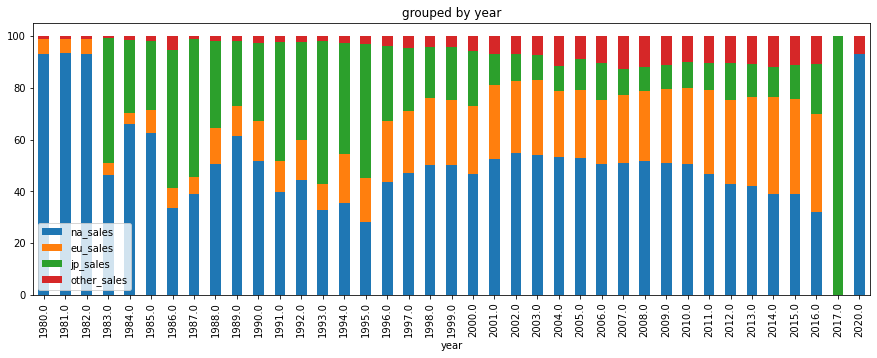

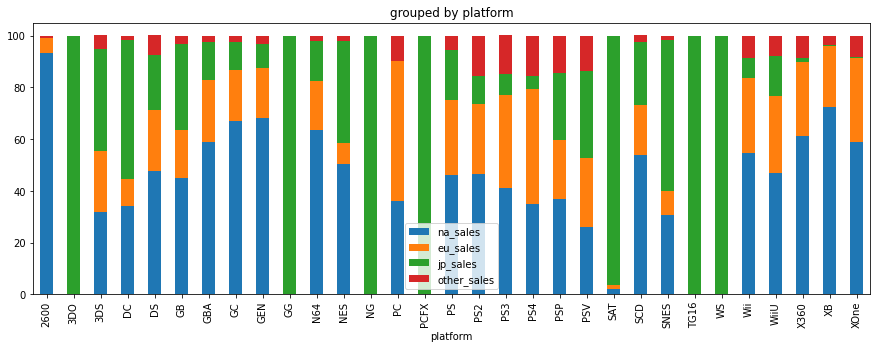

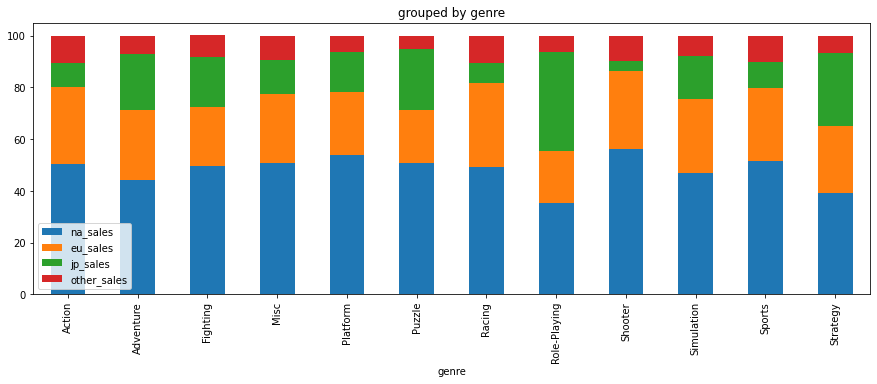

In [35]:
for i in ["year","platform","genre"]:
    g=df.groupby(i).agg({"na_sales":"sum","eu_sales":"sum","jp_sales":"sum","other_sales":"sum"}).reset_index()
    g.iloc[:,1:]=(g.iloc[:,1:].div(g.iloc[:,1:].sum(axis=1),axis=0)*100).round(1)
    g.plot(kind="bar",x=i,y=g.columns[1:],figsize=(15,5),stacked=True,title="grouped by "+i)
    plt.show()